In [106]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../icaMark/plots"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

subj1_series1_ica_10.png
subj1_series1_ica_11.png
subj1_series1_ica_12.png
subj1_series1_ica_13.png
subj1_series1_ica_14.png
subj1_series1_ica_15.png
subj1_series1_ica_16.png
subj1_series1_ica_17.png
subj1_series1_ica_18.png
subj1_series1_ica_19.png
subj1_series1_ica_1.png
subj1_series1_ica_20.png
subj1_series1_ica_21.png
subj1_series1_ica_22.png
subj1_series1_ica_23.png
subj1_series1_ica_24.png
subj1_series1_ica_25.png
subj1_series1_ica_26.png
subj1_series1_ica_27.png
subj1_series1_ica_28.png
subj1_series1_ica_29.png
subj1_series1_ica_2.png
subj1_series1_ica_30.png
subj1_series1_ica_31.png
subj1_series1_ica_32.png
subj1_series1_ica_3.png
subj1_series1_ica_4.png
subj1_series1_ica_5.png
subj1_series1_ica_6.png
subj1_series1_ica_7.png
subj1_series1_ica_8.png
subj1_series1_ica_9.png



In [107]:
import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import numpy as np
from time import time
from time import sleep

Working with 32 images
Image examples: 
subj1_series1_ica_18.png


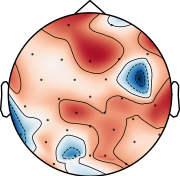

subj1_series1_ica_19.png


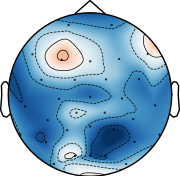

In [143]:
folder = "../icaMark/plots"

onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

print("Working with {0} images".format(len(onlyfiles)))
print("Image examples: ")

for i in range(10, 12):
    print(onlyfiles[i])
    display(_Imgdis(filename=folder + "/" + onlyfiles[i], width=180, height=176))

In [197]:
#image_labels = pd.read_csv("../subj1_series1_labels.csv")
#image_labels[image_labels.filename=="sub1_series1_ica_0"]
#data = {'filename':["subj1_series1_ica_%d.png"%i for i in range(1,33)], 'class':[7,7,7,7,7,1,7,7,1,7,7,3,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,2,2,]}
data = {'filename':["subj1_series1_ica_%d.png"%i for i in range(1,33)], 'class':[0,1,1,1,1,0,0,1,0,1,1,1,0,1,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0]}
df = pd.DataFrame(data)
df.head()
df[df.filename=="subj1_series1_ica_1.png"]["class"][0]
df[df.filename=="subj1_series1_ica_6.png"]["class"].iloc[0]
#df[df.filename == onlyfiles[0]]["class"].iloc[0]
#print (["class"][0])

0

In [211]:
from scipy import ndimage
import keras
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

train_files = []
y_train = []
i=0
for _file in onlyfiles:
    train_files.append(_file) 
    y_train.append( df[df.filename == _file]["class"].iloc[0] )
print("Files in train_files: %d" % len(train_files))

# Original Dimensions
image_width = 180
image_height = 176
ratio = 1

image_width = int(image_width / ratio)
image_height = int(image_height / ratio)

channels = 3
nb_classes = 1

dataset = np.ndarray(shape=(len(train_files), image_height, image_width, channels),
                     dtype=np.float32)

i = 0
for _file in train_files:
    img = load_img(folder + "/" + _file)  # this is a PIL image
    img.thumbnail((image_width, image_height))
    # Convert to Numpy Array
    x = img_to_array(img)  
    #print(x.shape)
    #x = x.reshape((3, 176, 180))
    # Normalize
    x = (x - 128.0) / 128.0
    dataset[i] = x
    i += 1
    if i % 250 == 0:
        print("%d images to array" % i)
print("All images to array!")


Files in train_files: 32
All images to array!


In [199]:
dataset.shape, len(y_train)

((32, 176, 180, 3), 32)

In [120]:
32*3*176*180

3041280

In [207]:
X_test.shape, X_train.shape

((7, 176, 180, 3), (25, 176, 180, 3))

In [212]:
from sklearn.model_selection import train_test_split

#Splitting 
X_train, X_test, y_train, y_test = train_test_split(dataset, y_train, test_size=0.2, random_state=33)
print("Train set size: {0}, Test set size: {1}".format(len(X_train), len(X_test)))

Train set size: 25, Test set size: 7


In [213]:
y_train
np.asarray(y_train)
len(X_train)
X_train.shape
#import np_utils.to_categorical as to_categorical

(25, 176, 180, 3)

In [214]:
#X_train = X_train.reshape(25,176,180,3)
#X_test = X_test.reshape(3,176,180,3)
#X_val = X_val.reshape(4,176,180,3)
#y_train = np_utils.to_categorical(y_train)
#y_test = np_utils.to_categorical(y_test)
#y_val = np_utils.to_categorical(y_val)
#y_train[0]
y_train = np.asarray(y_train).reshape(25,1)
y_test = np.asarray(y_test).reshape(7,1)

In [215]:
y_train.shape, X_train.shape
len(X_train)

25

In [216]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
import time
NB_CHANNELS = 3# 3 for RGB images or 1 for grayscale images
BATCH_SIZE = 8# Typical values are 8, 16 or 32
NB_TRAIN_IMG = len(X_train)# Replace with the total number training images
NB_VALID_IMG = len(X_test)# Replace with the total number validation images

In [217]:
cnn = Sequential()
cnn.add(Conv2D(filters=32, 
               kernel_size=(2,2), 
               strides=(1,1),
               padding='same',
#               input_shape=(180,176,NB_CHANNELS),
               input_shape=(176,180,NB_CHANNELS),
               data_format='channels_last'))
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2,2),
               strides=2))
cnn.add(Conv2D(filters=64,
               kernel_size=(2,2),
               strides=(1,1),
               padding='valid'))
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2,2),
                     strides=2))
cnn.add(Flatten())        
cnn.add(Dense(64))
cnn.add(Activation('relu'))
cnn.add(Dropout(0.25))
#cnn.add(Dense(units=7, activation='softmax'))
cnn.add(Dense(units=1, activation='softmax'))
cnn.add(Activation('sigmoid'))
cnn.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
start = time.time()
cnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size=1)
end = time.time()
print('Processing time:',(end - start)/60)
cnn.save_weights('cnn_baseline.h5')